<a href="https://colab.research.google.com/github/lightx26/VOCR-Training/blob/main/ocr_labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-up



> **Chuyển runtime sang T4-GPU để vietocr hoạt động nhanh hơn**



## Dependencies

Tải thư viện vietocr

In [ ]:
!pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 32.5 MB/s eta 0:00:00


Update thư viện pillow ~10.3.0 (version cũ có thể lỗi)

In [ ]:
!pip install pillow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vietocr 0.3.13 requires pillow==10.2.0, but you have pillow 10.3.0 which is incompatible.


In [ ]:
from PIL import Image
print(Image.__version__)

10.3.0


## Data

Tải file nén chứa dataset

In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vietocr 0.3.13 requires gdown==4.4.0, but you have gdown 5.1.0 which is incompatible.
vietocr 0.3.13 requires pillow==10.2.0, but you have pillow 10.3.0 which is incompatible.


In [ ]:
!gdown 155oYTSo09melE2xZ5yzLLlI8qdoEYGRV

Downloading...
From: https://drive.google.com/uc?id=155oYTSo09melE2xZ5yzLLlI8qdoEYGRV
To: /content/pbl_dataset_line1.zip
100% 10.2M/10.2M [00:00<00:00, 58.4MB/s]


In [ ]:
import os
import shutil

Tạo thư mục data

In [ ]:
os.makedirs("data", exist_ok=True)

Giải nén pbl_dataset4.zip vào data

In [ ]:
!unzip pbl_dataset_line1.zip -d data

Archive:  pbl_dataset_line1.zip
   creating: data/pbl_dataset_line1/
  inflating: data/pbl_dataset_line1/0314_12_1_10.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_11.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_13.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_14.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_15.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_16.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_17.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_19.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_20.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_21.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_22.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_24.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_25.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_26.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_27.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_28.jpg  
  inflating: data/pbl_dataset_line1/0314_12_1_5.jpg

Đổi tên folder pbl_dataset thành img

In [ ]:
os.rename(os.path.join("data", "pbl_dataset_line1"), os.path.join("data", "img"))

# Labelling

In [ ]:
img_path = os.path.join("data", "img")
annotation_path = os.path.join("data", "annotation1.txt")

In [ ]:
img_data = os.listdir(img_path)
img_data = sorted(img_data)  # sort alphabetically

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

In [ ]:
config = Cfg.load_config_from_name('vgg_seq2seq')
config['device'] = 'cpu'
# config['device'] = 'cuda:0'
detector = Predictor(config)

Model weight /tmp/vgg_seq2seq.pth exsits. Ignore download!


0314_28_3_6.jpg	được lập lại. Chúng tôi kêu gọi


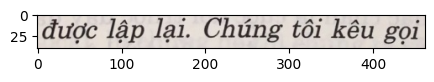

0314_28_3_7.jpg	đồng bào


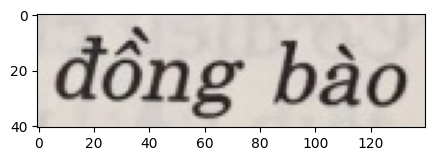

0314_28_3_8.jpg	trấn


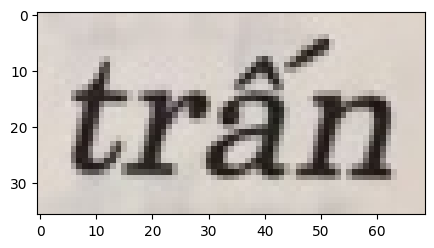

0314_28_3_9.jpg	tĩnh. Lũ khát máu bài Do


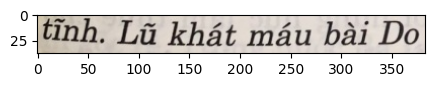

In [ ]:
i=800

# Mỗi lần duyệt 50 ảnh để so sánh nhãn và ảnh, nếu nhãn sai thì sửa lại trong file annotation.txt
for item in img_data[i:i+50]:
  path_to_image = os.path.join(img_path, item)
  img = Image.open(path_to_image)
  s = detector.predict(img)
  print(item + "\t" + s)
  plt.figure(figsize=(5, 3))
  plt.imshow(img)
  plt.show()
  with open(annotation_path, 'a', encoding='utf-8') as file:
    file.write("img/" + item + "\t" + s + "\n")

Xóa những ảnh lỗi (không phải text, nhiều dòng chữ, ...)

In [ ]:
os.remove(os.path.join(img_path, "corrupted_image.jpg"))
# Xóa ảnh thì nhớ xóa luôn nhãn

## Sync annotation file on drive

Mount drive in content/drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Copy annotation.txt from runtime to google drive

In [ ]:
!cp /content/data/annotation1.txt /content/drive/MyDrive/DatasetOCR/ds_line

Copy annotation.txt from google drive to runtime

In [ ]:
!cp /content/drive/MyDrive/DatasetOCR/ds_line/annotation1.txt /content/data